<a href="https://colab.research.google.com/github/softwareengel/fom2020-py/blob/master/fom-ms-wbi/2020WS_WBI_MS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# A03-02



In [1]:
# Initialisierung
import random

# geheimzahl = 4712

geheimzahl = random.randrange(1,101)
print ("geheimzahl", geheimzahl)
eingabe = 0
zaehler = 0
maxAnzahl = 7

# Schleifenkopf
while eingabe != geheimzahl:
    # Schleifenkörper
    eingabe = int(input("Ganze Zahl eingeben: "))
        
    if (eingabe < geheimzahl):
        print("Zahl zu klein")
    if (eingabe > geheimzahl):
        print("Zahl zu groß")
     
    zaehler = zaehler + 1

    if zaehler == maxAnzahl:
        print ("max. Rateanzahl erreicht.")
        break

    
if eingabe == geheimzahl:
    print("Richtig! Sie haben ", zaehler , "Versuche benötigt.")

geheimzahl 44
Ganze Zahl eingeben: 22
Zahl zu klein
Ganze Zahl eingeben: 44
Richtig! Sie haben  2 Versuche benötigt.


# Test von Ratestrategien 

In [2]:
import random
import matplotlib.pyplot as plt
import numpy as np


# Initialisierung
seed = 1 
simCount = 1000
is_debug = 0

startRange = 1
endeRange = 100


def ratezahl():

    geheimzahl = random.randrange(startRange, endeRange+1)
    return geheimzahl


def intervallhalbierung(start, ende, history, s):
    newTryVal = (start + ende) // 2
    if is_debug:
        print("(", start, ende, "): ", newTryVal)
    return newTryVal


def zufall(start, ende, history, cand):

    anz = len(cand)
    pos = random.randint(1, anz)
    newTryVal = cand[pos-1]
    if is_debug:
        print("(", start, ende, "): ", newTryVal)
    cand.remove(newTryVal)
    return newTryVal


def zufallcut(start, ende, history, cand):
    delList = list()
    for x in cand:
        if x < start:
            delList += x,
        elif x > ende:
            delList += x,
    for x in delList:
        cand.remove(x)

    anz = len(cand)
    pos = random.randint(1, anz)
    newTryVal = cand[pos-1]
    if is_debug:
        print("(", start, ende, "): ", newTryVal)
    return newTryVal


def rateprogramm(startRange, endeRange, f):

    geheimzahl = ratezahl()

    min = startRange
    max = endeRange
    if is_debug:
        print("geheimzahl", geheimzahl)

    eingabe = -1
    zaehler = 1

    # Schleifenkopf
    h = list()
    cand = list(range(min, max+1))

    while eingabe != geheimzahl:

        # Schleifenkörper
        # eingabe = int(input("Ganze Zahl eingeben: "))

        eingabe = f(min, max, h, cand)

        # print("Ratezahl: ", eingabe)
        if (eingabe < geheimzahl):
            if is_debug:
                print("Zahl zu klein")
            min = eingabe + 1
            h.append([geheimzahl, zaehler, eingabe, -1])

        if (eingabe > geheimzahl):
            if is_debug:
                print("Zahl zu groß")
            max = eingabe - 1
            h.append([geheimzahl, zaehler, eingabe, 1])
        if eingabe == geheimzahl:
            h.append([geheimzahl, zaehler, eingabe, 0])
            break
        zaehler = zaehler + 1

    if eingabe == geheimzahl:
        if is_debug:
            print("Richtig! Sie haben ", zaehler, "Versuche benötigt.")
    return h


def simRun(min, max, simCount, f):
    if seed == 0:
        random.seed()
    else:
        random.seed(seed)
    erglist = list()
    for x in range(simCount):
        erg = rateprogramm(min, max, f)
        erglist.append(erg)
    return erglist


def simulation(min, max):

    ergLists = list()

    erglist = simRun(min, max, simCount, zufall)
    ergLists.append(erglist)
    erglist = simRun(min, max, simCount, zufallcut)
    ergLists.append(erglist)
    erglist = simRun(min, max, simCount, intervallhalbierung)
    ergLists.append(erglist)

    tryLists = list()

    for l in ergLists:
        tryList = list()
        for res in l:
            tryList += len(res),
        # print(tryList)
        tryLists.append(tryList)
    
    return tryLists


trylists = simulation(startRange, endeRange)
print (trylists)






[[50, 92, 77, 25, 31, 66, 13, 25, 56, 17, 88, 11, 55, 56, 84, 15, 75, 15, 15, 21, 68, 69, 15, 19, 90, 78, 10, 2, 10, 25, 4, 58, 82, 58, 3, 42, 21, 60, 96, 66, 47, 95, 5, 33, 77, 1, 79, 22, 46, 48, 44, 24, 80, 45, 24, 97, 7, 53, 89, 67, 75, 8, 84, 33, 31, 11, 7, 75, 29, 66, 65, 39, 90, 18, 72, 82, 12, 94, 49, 60, 86, 48, 88, 65, 30, 27, 91, 99, 66, 45, 16, 31, 3, 61, 12, 39, 69, 27, 38, 55, 100, 88, 98, 68, 33, 49, 59, 27, 34, 93, 23, 10, 69, 31, 82, 98, 16, 82, 1, 66, 33, 80, 45, 9, 40, 77, 58, 10, 49, 9, 58, 30, 26, 63, 94, 6, 72, 88, 53, 49, 5, 4, 100, 1, 100, 65, 60, 84, 99, 37, 94, 21, 23, 10, 81, 26, 90, 69, 80, 63, 97, 11, 11, 58, 79, 74, 79, 19, 98, 38, 18, 61, 33, 84, 78, 21, 58, 15, 25, 49, 51, 42, 6, 9, 83, 92, 63, 41, 37, 23, 8, 28, 8, 67, 4, 66, 53, 78, 80, 51, 60, 45, 29, 15, 52, 41, 67, 76, 71, 55, 7, 8, 68, 2, 43, 25, 37, 35, 68, 24, 75, 75, 76, 58, 95, 1, 94, 4, 33, 82, 81, 56, 50, 2, 49, 50, 39, 45, 39, 92, 32, 45, 48, 81, 11, 77, 27, 86, 23, 49, 9, 85, 5, 17, 18, 97, 

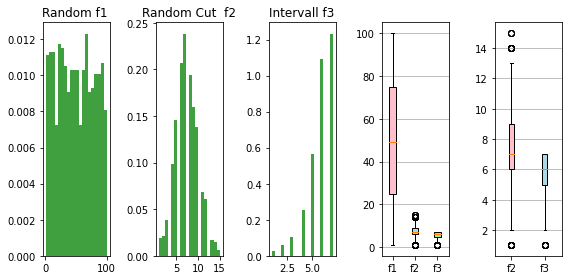

In [7]:
import random
import matplotlib.pyplot as plt
import numpy as np
def plot(all_data):

    fig, (ax0, ax1, ax2, ax3, ax4) = plt.subplots(ncols=5, figsize=(8, 4))

    ax0.hist(all_data[0], 20, density =True, histtype='stepfilled', facecolor='g', alpha=0.75)
    ax0.set_title('Random f1 ')

    ax1.hist(all_data[1], 20, density=1,
             histtype='stepfilled', facecolor='g', alpha=0.75)
    ax1.set_title('Random Cut  f2')

    ax2.hist(all_data[2], 20, density=1,
             histtype='stepfilled', facecolor='g', alpha=0.75)
    ax2.set_title('Intervall f3')

    bplot1 = ax3.boxplot(all_data,
                            vert=True,   # vertical box aligmnent
                            patch_artist=True)   # fill with color

    # fill with colors
    colors = ['pink', 'lightblue', 'lightgreen']
    # for bplot in (bplot1, bplot2):
    for bplot in (bplot1, ):
        for patch, color in zip(bplot['boxes'], colors):
            patch.set_facecolor(color)
    # adding horizontal grid lines
    ax3.yaxis.grid(True)
    ax3.set_xticks([y+1 for y in range(len(all_data))], )

    plt.setp(ax3, xticks=[y+1 for y in range(len(all_data))],
            xticklabels=['f1', 'f2', 'f3', 'f4'])

    all_data = all_data[1:]
    bplot2 = ax4.boxplot(all_data,
                            vert=True,   # vertical box aligmnent
                            patch_artist=True)   # fill with color
    # fill with colors
    colors = ['pink', 'lightblue', 'lightgreen']
    # for bplot in (bplot1, bplot2):
    for bplot in (bplot2, ):
        for patch, color in zip(bplot['boxes'], colors):
            patch.set_facecolor(color)
    # adding horizontal grid lines
    ax4.yaxis.grid(True)
    ax4.set_xticks([y+1 for y in range(len(all_data))], )
    
    plt.setp(ax4, xticks=[y+1 for y in range(len(all_data))],
            xticklabels=['f1', 'f2', 'f3', 'f4'])


    plt.setp(ax4, xticks=[y+1 for y in range(len(all_data))],
            xticklabels=[ 'f2', 'f3', 'f4'])

    fig.tight_layout()
    plt.show()
plot (trylists)